# Classication

#Decision Tree Classifier


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
# Load the dataset
df = sns.load_dataset('titanic')
# Display the first few rows of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#store a dataset in a variable
X = df[['pclass','sex','age','sibsp','parch','fare']]
y = df['survived']
print(X.shape, y.shape
      )

(891, 6) (891,)


In [ ]:
#check for null values in the dataset
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [12]:
#handle null values by filling them with the mean for numerical columns
X['age'].fillna(X['age'].mean(), inplace=True)

C:\Users\HKT\AppData\Local\Temp\ipykernel_13260\3000253305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].mean(), inplace=True)


In [13]:
#check for null values again
X.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

In [14]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#model ko bulana ha
model = DecisionTreeClassifier()
#model ko train karna ha
model.fit(X_train, y_train)
#model ki accuracy check karna ha
# accuracy = model.score(X_test, y_test)
# print(f"Model Accuracy: {accuracy * 100:.2f}%")
#model ki prediction karna ha
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1]


In [42]:
#model ki accuracy check karna ha
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.994413407821229


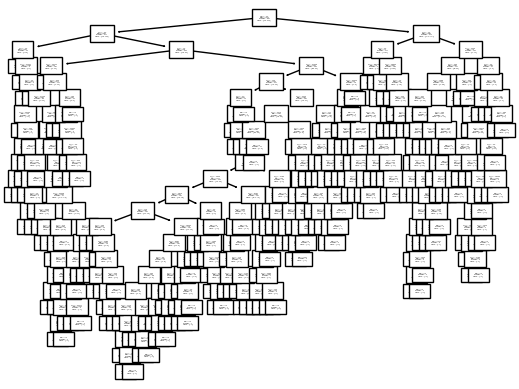

<Figure size 640x480 with 0 Axes>

In [43]:
tree.plot_tree(model.fit(X,y),fontsize=True)
plt.show()
plt.savefig('tree.png')

#find

.Precision score:

The precision score is the ratio of true positives to the sum of true positives and false positives.

.recall score:

The recall score is the ratio of true positives to the sum of true positives and false negatives.

.f1 score:

The F1 score is the harmonic mean of precision and recall.

In [44]:
#find metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

Precision: 0.7142857142857143
Recall: 0.6756756756756757
F1 Score: 0.6944444444444444
Accuracy: 0.7541899441340782


Text(0.5, 1.0, 'Confusion Matrix')

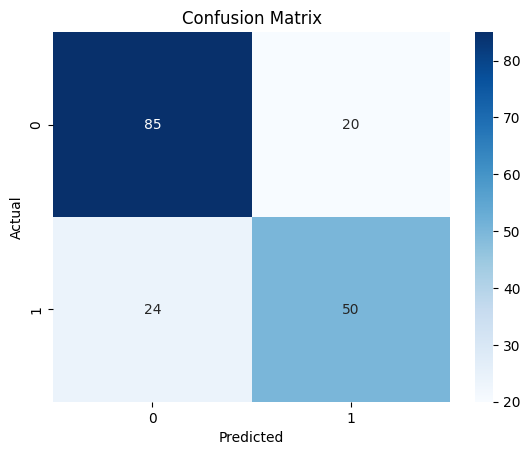

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)   
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [46]:
#K-Nearest Neighbors
#import library
from sklearn.neighbors import KNeighborsClassifier
#create a model
knn_model = KNeighborsClassifier(n_neighbors=5)
#train the model
knn_model.fit(X_train, y_train)
#make predictions
knn_y_pred = knn_model.predict(X_test)
print("KNN Predictions:", knn_y_pred)
#check accuracy
knn_accuracy = knn_model.score(X_test, y_test)
print("KNN Accuracy:", knn_accuracy)
cm = confusion_matrix(y_test, knn_y_pred)
cm


KNN Predictions: [0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]
KNN Accuracy: 0.6927374301675978


array([[84, 21],
       [34, 40]])

Text(50.722222222222214, 0.5, 'Actual')

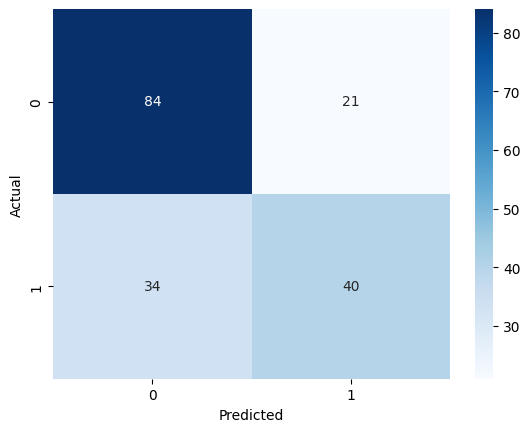

In [47]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [50]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
# Make predictions
rf_y_pred = rf_model.predict(X_test)
print("Random Forest Predictions:", rf_y_pred)
#accuracy
rf_accuracy = rf_model.score(X_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)
cm = confusion_matrix(y_test, rf_y_pred)
cm
print("confusion_matrix:", y_test, rf_y_pred)

print("precision_score:", precision_score(y_test, rf_y_pred))
print("recall_score:", recall_score(y_test, rf_y_pred))
print("f1_score:", f1_score(y_test, rf_y_pred))

Random Forest Predictions: [0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]
Random Forest Accuracy: 0.7988826815642458
confusion_matrix: 709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64 [0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]
precision_score: 0.7794117647058824
recall_

In [55]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
# Train the model
logistic_model.fit(X_train, y_train)
# Make predictions
predictions = logistic_model.predict(X_test)
print("Logistic Regression Predictions:", predictions)
#check accuracy
logistic_accuracy = logistic_model.score(X_test, y_test)
print("Logistic Regression Accuracy:", logistic_accuracy)
cm = confusion_matrix(y_test, predictions)
print("confusion_matrix:", y_test, predictions)
cm
print("precision_score:", precision_score(y_test, predictions))
print("recall_score:", recall_score(y_test, predictions))
print("f1_score:", f1_score(y_test, predictions))


Logistic Regression Predictions: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]
Logistic Regression Accuracy: 0.8100558659217877
confusion_matrix: 709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64 [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]
precision_score: 0.803030303030

SVM Predictions: [0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1]
SVM Accuracy: 0.7821229050279329
confusion_matrix: 709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64 [0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1]
precision_score: 0.7536231884057971
recall_score: 0.70270270270

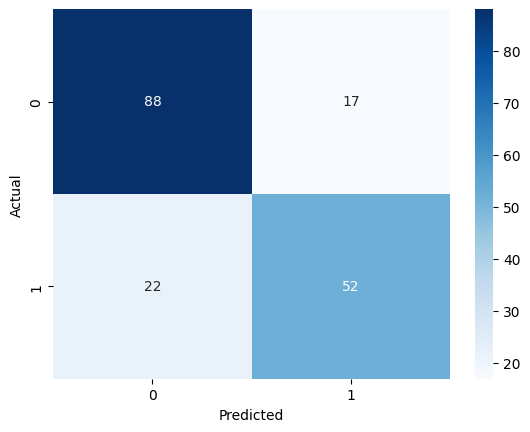

In [59]:
#SVM
from sklearn.svm import SVC
# Create a Support Vector Machine model
svm_model = SVC(kernel='linear')
# Train the model
svm_model.fit(X_train, y_train)
# Make predictions
svm_y_pred = svm_model.predict(X_test)
print("SVM Predictions:", svm_y_pred)
#check accuracy
svm_accuracy = svm_model.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)
cm = confusion_matrix(y_test, svm_y_pred)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print("confusion_matrix:", y_test, svm_y_pred)
print("precision_score:", precision_score(y_test, svm_y_pred))
print("recall_score:", recall_score(y_test, svm_y_pred))
print("f1_score:", f1_score(y_test, svm_y_pred))

Naive Bayes Predictions: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1]
Naive Bayes Accuracy: 0.7877094972067039
confusion_matrix: 709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: survived, Length: 179, dtype: int64 [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1]
precision_score: 0.7571428571428571
recall_scor

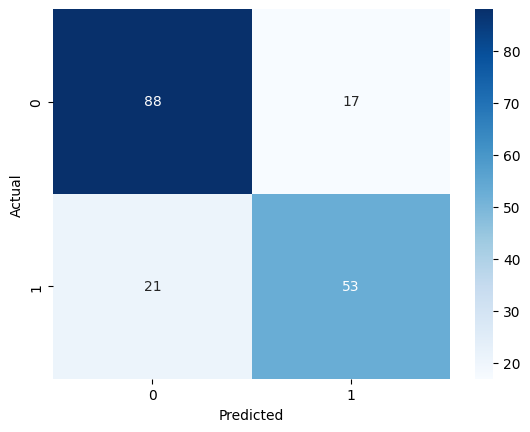

In [60]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Create a Naive Bayes model
nb_model = GaussianNB()
# Train the model
nb_model.fit(X_train, y_train)
# Make predictions
nb_y_pred = nb_model.predict(X_test)
print("Naive Bayes Predictions:", nb_y_pred)
#check accuracy
nb_accuracy = nb_model.score(X_test, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
cm = confusion_matrix(y_test, nb_y_pred)
cm
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print("confusion_matrix:", y_test, nb_y_pred)
print("precision_score:", precision_score(y_test, nb_y_pred))
print("recall_score:", recall_score(y_test, nb_y_pred))
print("f1_score:", f1_score(y_test, nb_y_pred))

In [61]:
#how to select the best model
# Compare the models based on accuracy
#import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import cross_val_score,train_test_split
# Define the models
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
# Initialize a list to store the accuracy scores
k = 10
for model in models:
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=k)
    # Print the model name and its accuracy
    print(f"{model.__class__.__name__} Accuracy: {np.mean(scores) * 100:.2f}%")


c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

LogisticRegression Accuracy: 79.12%
KNeighborsClassifier Accuracy: 72.29%
RandomForestClassifier Accuracy: 81.27%
SVC Accuracy: 68.13%


In [63]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
# Create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)
# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Score: 0.7248104008667389
